# Welcome!

For my first CSC630-Data Visualization assignment, I will be creating a data visualization that compares parts to a whole. To do so, I will be using housing data from the state of Massachusetts (to clarify, this is NOT the famous / infamous Boston Housing Prices Dataset). 

## Imports

In [28]:
# a few libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [7]:
# read in the data 
data = pd.read_csv("/Users/isaacheitmann/Desktop/Boston_March2018.csv")
data

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
0,72049670,SLD,239900.0,247000.0,8/6/2016,3/1/2018,NaN,295,295,16 Pine St,...,NaN,NaN,NaN,NaN,NaN,MF,Pine St,16,16,http://media.mlspin.com/photo.aspx?mls=72049670
1,72056522,SLD,338000.0,338000.0,8/22/2016,3/1/2018,NaN,545,515,80 Cherry Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,CC,Cherry Drive,80,80,http://media.mlspin.com/photo.aspx?mls=72056522
2,72080286,SLD,2999999.0,2950000.0,10/12/2016,3/1/2018,NaN,504,493,80 Monadnock Road,...,NaN,WPS,WMS,WHS,Basement:Yes;Fireplaces:3;Roof:Asphalt/Fibergl...,SF,Monadnock Road,80,80,http://media.mlspin.com/photo.aspx?mls=72080286
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
4,72124101,SLD,525000.0,525000.0,2/28/2017,3/1/2018,NaN,867,287,53 Maple Ridge Rd,...,NaN,NaN,NaN,Northampton,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Maple Ridge Rd,53,53,http://media.mlspin.com/photo.aspx?mls=72124101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5166,72297021,SLD,549860.0,549860.0,3/21/2018,3/28/2018,NaN,1,1,55 Goldfinch Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:--;Floor:--;App...,SF,Goldfinch Drive,55,55,http://media.mlspin.com/photo.aspx?mls=72297021
5167,72298565,SLD,97500.0,135000.0,3/26/2018,3/28/2018,NaN,0,0,15 Wood Path,...,NaN,J.R. Briggs,Overlook,Oakmont,Basement:Yes;Fireplaces:0;Roof:Asphalt/Fibergl...,SF,Wood Path,15,15,http://media.mlspin.com/photo.aspx?mls=72298565
5168,72298853,SLD,675000.0,616500.0,3/27/2018,3/30/2018,NaN,2,2,373 Bay Lane,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Bay Lane,373,373,http://media.mlspin.com/photo.aspx?mls=72298853
5169,72299954,SLD,369900.0,369000.0,3/22/2018,3/29/2018,NaN,7,4,17 Rounsevell Dr,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Rounsevell Dr,17,17,http://media.mlspin.com/photo.aspx?mls=72299954


In [8]:
data.columns

Index(['MLSNUM', 'STATUS', 'LISTPRICE', 'SOLDPRICE', 'LISTDATE', 'SOLDDATE',
       'EXPIREDDATE', 'DOM', 'DTO', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'AREA',
       'BEDS', 'BATHS', 'SQFT', 'AGE', 'LOTSIZE', 'AGENTNAME', 'OFFICENAME',
       'OFFICEPHONE', 'SHOWINGINSTRUCTIONS', 'REMARKS', 'STYLE', 'LEVEL',
       'GARAGE', 'HEATING', 'COOLING', 'ELEMENTARYSCHOOL', 'JUNIORHIGHSCHOOL',
       'HIGHSCHOOL', 'OTHERFEATURES', 'PROPTYPE', 'STREETNAME', 'HOUSENUM1',
       'HOUSENUM2', 'PHOTOURL'],
      dtype='object')

There is a lot of data in the .csv file above. To make things more specific, I will first select the homes that are from Andover, MA: 

In [12]:
andover_data = data[data["CITY"] == "Andover"]
andover_data

,MLSNUM,STATUS,LISTPRICE,SOLDPRICE,LISTDATE,SOLDDATE,EXPIREDDATE,DOM,DTO,ADDRESS,...,COOLING,ELEMENTARYSCHOOL,JUNIORHIGHSCHOOL,HIGHSCHOOL,OTHERFEATURES,PROPTYPE,STREETNAME,HOUSENUM1,HOUSENUM2,PHOTOURL
3,72118879,SLD,2600000.0,2600000.0,2/14/2017,3/1/2018,NaN,28,14,15 Trevino Circle,...,NaN,West Elementary,West Middle,Andover High,Basement:Yes;Fireplaces:3;Roof:--;Floor:--;App...,SF,Trevino Circle,15,15,http://media.mlspin.com/photo.aspx?mls=72118879
30,72209351,SLD,779900.0,779900.0,8/5/2017,3/1/2018,NaN,167,152,73 Woburn St,...,NaN,South,NaN,NaN,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Woburn St,73,73,http://media.mlspin.com/photo.aspx?mls=72209351
509,72105416,SLD,329995.0,354875.0,1/4/2017,3/6/2018,NaN,207,207,459 River Rd (Unit 1102),...,NaN,NaN,NaN,NaN,Basement:No;Fireplaces:0;Roof:Asphalt/Fibergla...,CC,River Rd (Unit 1102),459,459,http://media.mlspin.com/photo.aspx?mls=72105416
591,72234886,SLD,695000.0,660000.0,9/27/2017,3/6/2018,NaN,131,116,331 S Main St,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:5;Roof:Asphalt/Fibergl...,SF,S Main St,331,331,http://media.mlspin.com/photo.aspx?mls=72234886
612,72239970,SLD,369665.0,369665.0,10/8/2017,3/6/2018,NaN,7,7,459 River Rd (Unit 1109),...,NaN,NaN,NaN,NaN,"Basement:No;Fireplaces:0;Roof:--;Floor:Wood, T...",CC,River Rd (Unit 1109),459,459,http://media.mlspin.com/photo.aspx?mls=72239970
950,72279301,SLD,190000.0,195000.0,2/8/2018,3/7/2018,NaN,7,7,60B Washington Park Dr,...,NaN,West/Shawsheen,West,Andover,Basement:No;Fireplaces:0;Roof:--;Floor:--;Appl...,CC,Washington Park Dr,60,60B,http://media.mlspin.com/photo.aspx?mls=72279301
1010,72193618,SLD,925000.0,900000.0,7/6/2017,3/15/2018,NaN,191,165,17 Ivana Drive,...,NaN,NaN,NaN,NaN,Basement:Yes;Fireplaces:2;Roof:Asphalt/Fibergl...,CC,Ivana Drive,17,17,http://media.mlspin.com/photo.aspx?mls=72193618
1021,72203128,SLD,569900.0,569900.0,7/25/2017,3/14/2018,NaN,16,16,Lot 35 Boardwalk Drive,...,NaN,High Plain,Wood Hill,Andover High,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Boardwalk Drive,35,Lot 35,http://media.mlspin.com/photo.aspx?mls=72203128
1086,72225489,SLD,689000.0,665000.0,9/8/2017,3/9/2018,NaN,151,136,84 Cross Street,...,NaN,High Plain,Wood Hill,A.H.S.,Basement:Yes;Fireplaces:1;Roof:Asphalt/Fibergl...,SF,Cross Street,84,84,http://media.mlspin.com/photo.aspx?mls=72225489
1305,72254135,SLD,1629900.0,1629900.0,11/10/2017,3/15/2018,NaN,14,4,3 Barron Court,...,NaN,Sanborn,Wood Hill,AHS,Basement:Yes;Fireplaces:4;Roof:Asphalt/Fibergl...,SF,Barron Court,3,3,http://media.mlspin.com/photo.aspx?mls=72254135


Then, I will __compare the number of houses associated with each school to the total number of houses__:

In [45]:
# numbers of each 
WMS = andover_data[(andover_data["JUNIORHIGHSCHOOL"] == "West") | (andover_data["JUNIORHIGHSCHOOL"] == "West Middle")]
Wood_MS = andover_data[andover_data["JUNIORHIGHSCHOOL"] == "Wood Hill"]
DMS = andover_data[(andover_data["JUNIORHIGHSCHOOL"] == "Doherty") | ("Doherty Middle" in andover_data["JUNIORHIGHSCHOOL"] == "Doherty Middle")]
Other_MS_len = len(andover_data) - len(WMS) - len(Wood_MS) - len(DMS)

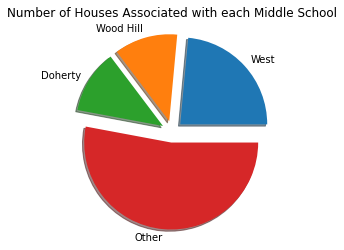

In [49]:
# Compare, using a pie chart: 
plt.pie([len(WMS),len(Wood_MS), len(DMS), Other_MS_len], labels=["West", "Wood Hill", "Doherty", "Other"], shadow="True", explode=[1/8, 1/8, 1/8, 1/8])
plt.title("Number of Houses Associated with each Middle School")
plt.show()